In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/heart_disease_ALL_2005_2020_balanced_withoutNULLS (2).csv')
df

,Age,Sex,HDL,LDL,FastingGlucose,BMI,SystolicBP,Hypertension,Diabetes,Smoking,HeartDisease
0,22.0,0,51.0,70.0,106.0,18.30,118.0,0,0.0,0.0,0
1,66.0,0,46.0,106.0,111.0,36.00,148.0,1,0.0,0.0,0
2,35.0,0,33.0,100.0,139.0,53.10,98.0,0,0.0,1.0,1
3,80.0,0,83.0,111.0,103.0,32.31,180.0,1,0.0,0.0,1
4,37.0,0,61.0,83.0,95.0,27.00,116.0,1,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13155,75.0,1,29.0,86.0,116.0,27.27,122.0,1,0.0,1.0,1
13156,80.0,0,61.0,88.0,163.0,30.82,152.0,1,1.0,0.0,1
13157,60.0,1,34.0,25.0,73.0,29.10,136.0,1,1.0,1.0,1
13158,74.0,1,29.0,67.0,95.0,26.60,132.0,1,0.0,1.0,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the trained scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


##SVM

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Define the SVM model
svm = SVC()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 0.01, 50, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8392854332876523
Test Accuracy: 0.8370060790273556


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1366
           1       0.79      0.90      0.84      1266

    accuracy                           0.84      2632
   macro avg       0.84      0.84      0.84      2632
weighted avg       0.84      0.84      0.84      2632

[[1066  300]
 [ 129 1137]]


<Axes: >

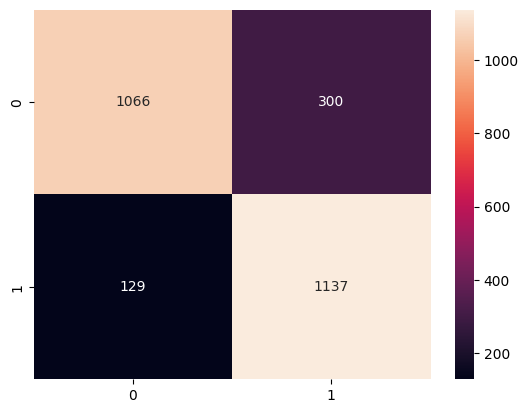

In [31]:
#printing the classifiction report and the confussion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [32]:
# printing f1-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8412874583795783

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1366
           1       0.80      0.91      0.85      1266

    accuracy                           0.85      2632
   macro avg       0.85      0.85      0.85      2632
weighted avg       0.85      0.85      0.85      2632



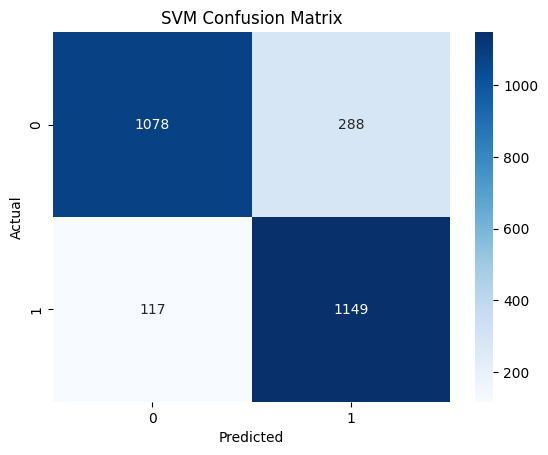

SVM Training Score: 0.8945406145115725
SVM Testing Score: 0.8458547417561889
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1366
           1       0.95      0.98      0.96      1266

    accuracy                           0.96      2632
   macro avg       0.96      0.96      0.96      2632
weighted avg       0.96      0.96      0.96      2632



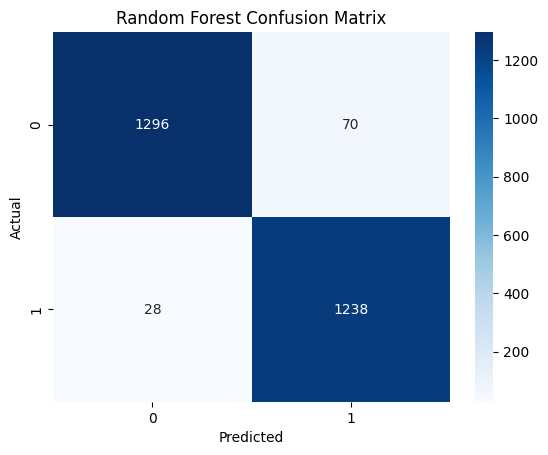

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.9627790570051108
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1366
           1       0.90      0.99      0.94      1266

    accuracy                           0.94      2632
   macro avg       0.94      0.94      0.94      2632
weighted avg       0.95      0.94      0.94      2632



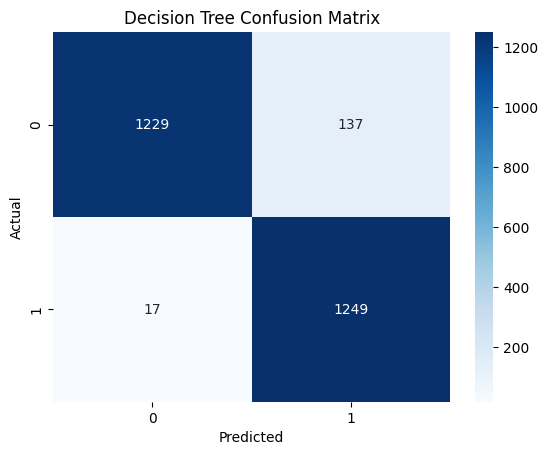

Decision Tree Training Score: 1.0
Decision Tree Testing Score: 0.9414690895720015


In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Check for overfitting
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{model_name} Training Score:", train_score)
    print(f"{model_name} Testing Score:", test_score)
    if train_score - test_score > 0.1:
        print(f"Warning: {model_name} might be overfitting!")

# Define the hyperparameter grids
svm_param_grid = {
    'C': [0.1, 1, 10, 50, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
}
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV for SVM
svm = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model(svm, "SVM")

# Perform GridSearchCV for Random Forest
rf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model(rf, "Random Forest")

# Perform GridSearchCV for Decision Tree
dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model(dt, "Decision Tree")


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1366
           1       0.80      0.91      0.85      1266

    accuracy                           0.85      2632
   macro avg       0.85      0.85      0.85      2632
weighted avg       0.85      0.85      0.85      2632



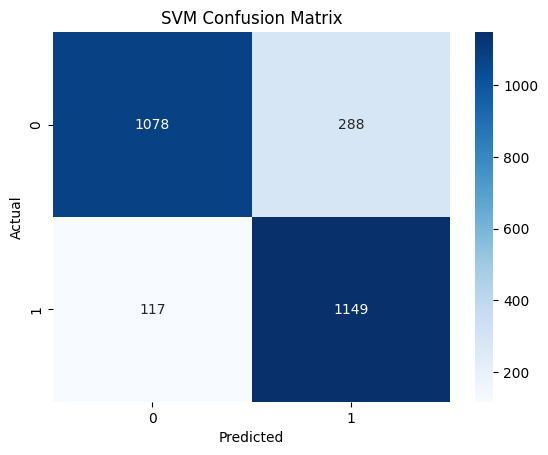

SVM Training Score: 0.8945406145115725
SVM Testing Score: 0.8458547417561889
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1366
           1       0.95      0.98      0.96      1266

    accuracy                           0.96      2632
   macro avg       0.96      0.97      0.96      2632
weighted avg       0.97      0.96      0.96      2632



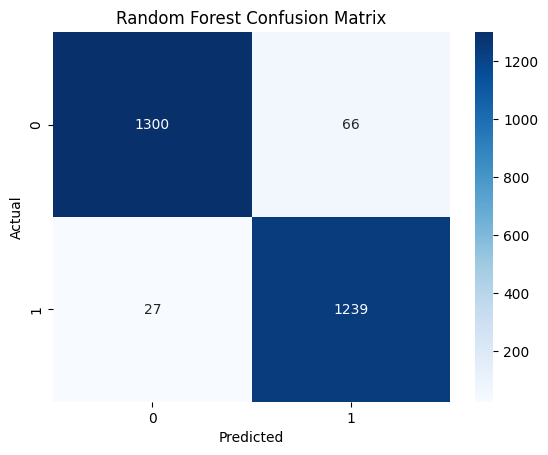

Random Forest Training Score: 0.9998100317613754
Random Forest Testing Score: 0.9646777944567637
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1366
           1       0.90      0.98      0.94      1266

    accuracy                           0.94      2632
   macro avg       0.94      0.94      0.94      2632
weighted avg       0.94      0.94      0.94      2632



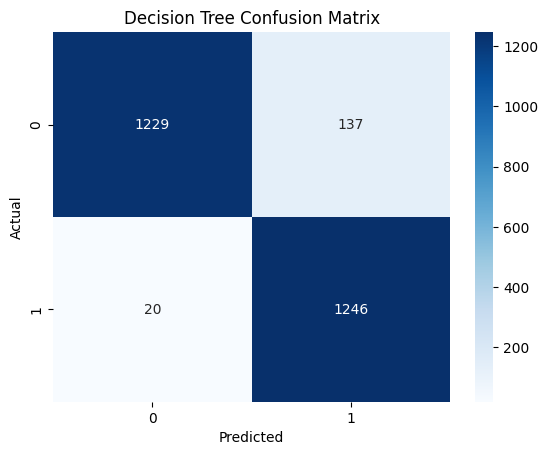

Decision Tree Training Score: 1.0
Decision Tree Testing Score: 0.9403324165365513
Best Parameters for SVM: {'C': 100, 'kernel': 'rbf'}
SVM ROC-AUC Score: 0.8939715130950482
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Random Forest ROC-AUC Score: 0.9912750758085669
Random Forest Feature Importances: [0.19342597 0.02589746 0.12119885 0.16819877 0.13113422 0.13128794
 0.11641165 0.0652638  0.02682794 0.02035341]
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None}
Decision Tree ROC-AUC Score: 0.9419546929608479
Decision Tree Feature Importances: [0.21270703 0.02387834 0.12208379 0.14824571 0.13461357 0.16119858
 0.11292447 0.05081432 0.0204356  0.01309859]


In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Function to evaluate models
def evaluate_model2(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Check for overfitting
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{model_name} Training Score:", train_score)
    print(f"{model_name} Testing Score:", test_score)
    if train_score - test_score > 0.1:
        print(f"Warning: {model_name} might be overfitting!")

# Define the hyperparameter grids
svm_param_grid = {
    'C': [0.1, 1, 10, 50, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
}
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV for SVM
svm = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model2(svm, "SVM")

# Perform GridSearchCV for Random Forest
rf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model2(rf, "Random Forest")

# Perform GridSearchCV for Decision Tree
dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
evaluate_model2(dt, "Decision Tree")

# Function to get best parameters, ROC-AUC, and feature importance
def analyze_model(model, model_name):
    print(f"Best Parameters for {model_name}:", model.best_params_)

    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    if y_pred_proba is not None and len(set(y)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"{model_name} ROC-AUC Score:", roc_auc)

    if hasattr(model.best_estimator_, 'feature_importances_'):
        feature_importance = model.best_estimator_.feature_importances_
        print(f"{model_name} Feature Importances:", feature_importance)

# Analyze models
analyze_model(svm, "SVM")
analyze_model(rf, "Random Forest")
analyze_model(dt, "Decision Tree")


Accuracy: 0.9650455927051672
Precision: 0.9653903693265395
Recall: 0.9650455927051672
F1-score: 0.9650569226083212


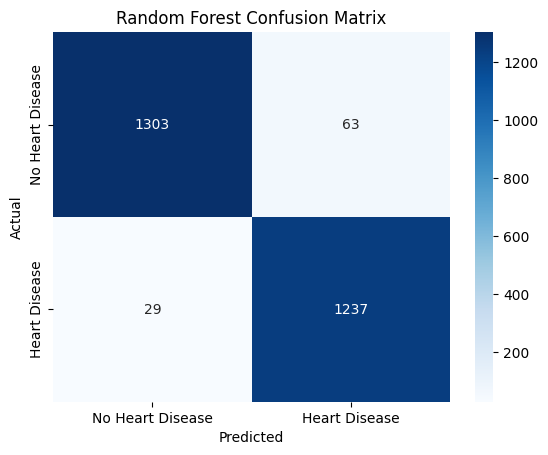

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve



# Train the best Random Forest model
best_rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(set(y)) == 2 else "N/A"

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()




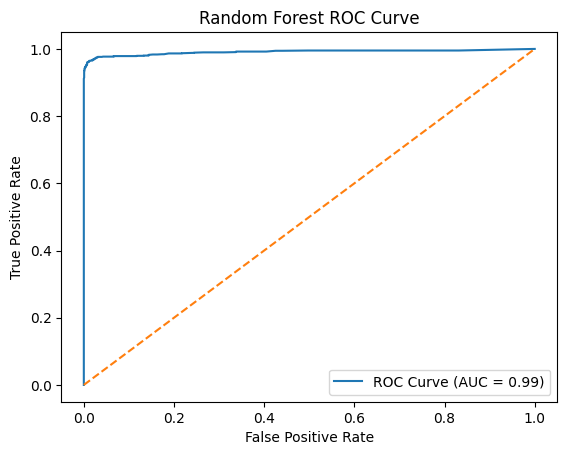

In [37]:
if len(set(y)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend()
    plt.show()

In [41]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances


,Feature,Importance
0,Age,0.196567
3,LDL,0.162223
4,FastingGlucose,0.131698
5,BMI,0.129334
2,HDL,0.120743
6,SystolicBP,0.117308
7,Hypertension,0.067199
1,Sex,0.027784
8,Diabetes,0.027397
9,Smoking,0.019748


In [43]:
#save the model
import joblib
joblib.dump(best_rf, 'CHD_RF.pkl')

['CHD_RF.pkl']

In [44]:
import os
print(os.getcwd())  # This shows where the file is being saved


/content


In [45]:
os.chdir('/content/')  # Change directory if needed
joblib.dump(best_rf, 'CHD_RF.pkl')


['CHD_RF.pkl']

In [49]:
import os
print("File exists:", os.path.exists('CHD_RF.pkl'))

File exists: True


In [48]:
from google.colab import files
files.download('CHD_RF.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>